In [176]:
#predict the probability of Heart Disease 
import pandas as pd
import numpy as np

#A

heart_short_df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")


#heart_short_df[0::10]


In [177]:
#Creating a feature matrix and label vector (AHD)
feature_cols = ['Age', 'RestBP', 'Chol','RestECG', 'MaxHR', 'Oldpeak']

#assigning list of selected features above to X
X = heart_short_df[feature_cols]

#printing first 5 rows to test
X.head()

#creating label vector with label AHD (has heart disease or not)
y = heart_short_df['AHD']

#checking label vector
#y[::10]

#normalizing (scaling) features to be used in the dataset split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
sc_heart_df = sc.transform(X)
Z = sc_heart_df

#sc_heart_df[0::10]

In [178]:
#Split the dataset into testing and training sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (Z, y, test_size=0.25, random_state=3)

In [179]:
#Using Logistic Regression classifier to predict Heart Disease occurence based on data in part C, then report accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#instantiating object of 'Logistic Regression' class
heart_logreg = LogisticRegression()

#Training the predictive model
heart_logreg.fit(X_train, y_train)

#testing predictive model
y_predict_lr = heart_logreg.predict(X_test)

#calculating and printing accuracy
accuracy_lr = accuracy_score(y_test, y_predict_lr)

print('Logistic Regression accuracy is : ', accuracy_lr)

Logistic Regression accuracy is :  0.7183098591549296


In [180]:
#Estimating the probability (likelihood) of Each label (both for 0 and 1):
y_predict_prob_lr = heart_logreg.predict_proba(X_test)

#print(y_predict_lr)

#printing the estimated likelihood of both labels for the testing set (0 and 1, or no heart disease and yes heart disease respectively)
#print(y_predict_prob_lr)

#printing the "estimated likelyhood of label=1" (means the likelihood the patient has heart disease)
print(y_predict_prob_lr[:,1])

[0.50152811 0.44846777 0.60485848 0.60363525 0.1536715  0.22957916
 0.26514628 0.13451391 0.64470136 0.3292041  0.90441626 0.08075189
 0.70903558 0.56956399 0.33191847 0.14075209 0.88401518 0.31675549
 0.88760037 0.66514189 0.14587202 0.13623252 0.77503511 0.07089471
 0.89081309 0.42556635 0.27073103 0.56788083 0.32247083 0.22399912
 0.69887296 0.89135203 0.82441949 0.10841795 0.18993298 0.98870386
 0.93273544 0.26741294 0.79519141 0.48550866 0.282992   0.69413125
 0.33667486 0.17922533 0.96610847 0.66271057 0.12528777 0.14343511
 0.63172735 0.40237782 0.37035602 0.80530746 0.03913305 0.76936798
 0.11167265 0.19466654 0.11244591 0.3568092  0.16280918 0.22948696
 0.72249443 0.17159489 0.23296984 0.33753157 0.24405164 0.12456215
 0.30484273 0.07298196 0.09408331 0.22991179 0.08301102]


In [181]:
#ROC CURVE
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')

print(fpr)
print(tpr)

AUC = metrics.auc(fpr, tpr)
print(AUC)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]
0.7650406504065042


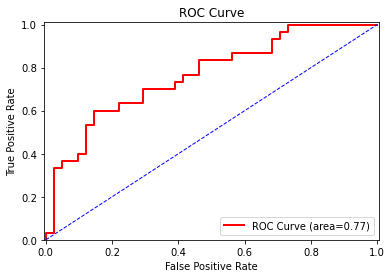

In [182]:
#Importing the "pyplot" package of "matplotlib" library of python to generate graphs and plot curves
import matplotlib.pyplot as plt

#to keep the figures inside the explorer page rather than opening a new figure window:
%matplotlib inline

plt.figure()

#ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area=%0.2f)' % AUC)

#Random Guess Line:
plt.plot([0,1], [0,1], color='blue', lw=1, linestyle='--')

#Defining the range of X-axis and Y-axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Labels, Title, Legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()
